# Dependências

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Carregando os Dados

Nesse notebook, nós vamos utilizar o banco **Boston Housing**. Você pode conferir uma descrição completa dele abaixo:

<img src='https://miro.medium.com/max/1526/1*i9vZk7NkS1dZz6JEcbV5nA.png'>

___

Vamos agora carregar os dados com a ajuda do scikit-learn:

In [0]:
data_dict = load_boston()
df = pd.DataFrame(data_dict['data'], columns=data_dict['feature_names'])
df['target'] = data_dict['target']

print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Repare que temos **506 amostras**. Cada amostra tem **13 atributos (variáveis)** (por isso o nome *multivariada*) + a **variável resposta** (*target*) que representa, nesse banco, o valor mediano das casas em milhares de dólares.

# Data Analysis

Primeiramente, vamos observar a correlação entre cada variável:

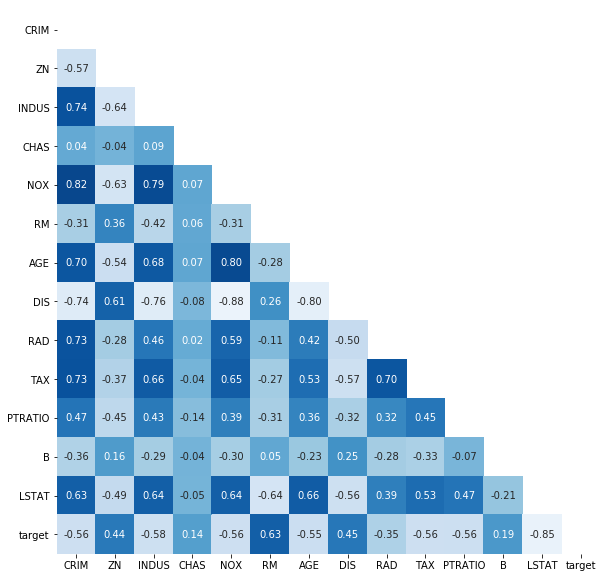

In [0]:
corr = df.corr(method='spearman')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots()
ax.figure.set_size_inches(10, 10)
sns.heatmap(corr, ax=ax, annot=True, mask=mask, fmt='.2f', cbar=False, square=True, cmap=plt.cm.Blues, center=0)

Além disso, vamos observar através de um gráfico de dispersão, a relação de cada atributo com a saída:

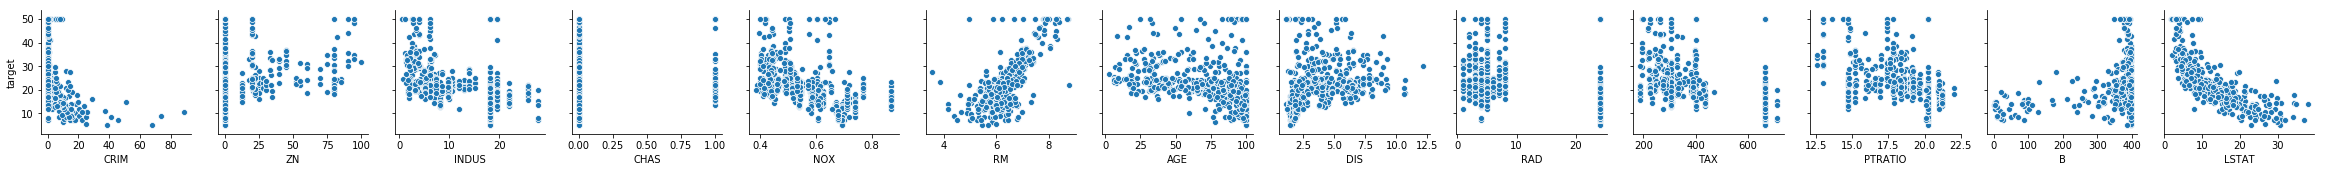

In [0]:
sns.pairplot(df, x_vars=data_dict['feature_names'], y_vars='target')
plt.show()

# Dividindo em Treinamento/Teste

Uma das tarefas comuns em Machine Learning é dividir o dataset em bancos de treinamento e teste. O **banco de treinamento** será o banco que o seu algoritmo terá acesso para aprender. É nele que o algoritmo otimiza os parâmetros. O **banco de teste** é um banco que seu algoritmo nunca viu durante o treinamento. Ele é utilizado apenas uma vez, depois do algoritmo ser treinado, pra avaliar a generalização do modelo. São os resultados desse banco que devem ser reportados. Vale salientar que **os bancos de treinamento e teste devem ser mutuamente exclusivos**, isto é, amostras que aparecem no treinamento não devem estar presentes no teste e vice-versa.

Por sorte, o scikit-learn já tem um método que separa as amostras em treinamento e teste. Pra usar ele, é bem simples:

In [0]:
x_train, x_test, y_train, y_test = train_test_split(df[data_dict['feature_names']].values, df.target.values, test_size=0.2, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


Explicação dos parâmetros:
- `test_size`: define a quantidade de dados que será separada para teste. Se for um valor entre 0 e 1, significa a porcentagem de amostras. Nesse exemplo, 20% das amostras serão separadas pra teste. Você também pode utilizar um número inteiro pra indicar quantas amostras exatamente serão utilizadas pra teste.
- `random_state`: define a semente de número aleatório pra divisão do banco. Quando definida, como no exemplo acima, permite a reprodutibilidade dos resultados. Ou seja, o banco será dividido sempre da mesma forma.

# Normalização

Outro passo muito importante no treinamento de modelos de Machine Learning é a **normalização dos atributos (features)**. Fica fácil entender o porquê através da análise descritiva dos atributos:

In [0]:
df[data_dict['feature_names']].describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Repare que cada atributo (feature) do nosso banco apresenta sua própria escala. Por exemplo, enquanto alguns atributos variam de [0, 1], outros variam de 187 a 711. 

> **Se você não normaliza seus atributos, o seu modelo pode dar preferência a certos atributos, enviesando o modelo**.

Existem diversas formas de padronização no scikit-learn. Entre elas, a `StandardScaler` é responsável por padronizar cada atributo à distribuição normal. Isto é, cada atributo será normalizado pela seguinte fórmula:

$$x_i = \frac{x_i - \mu_i}{\sigma_i}$$

Onde, $\mu_i$ e $\sigma_i$ representam a média e o desvio-padrão do i-ésimo atributo.

Com o scikit-learn, a normalização dos dados é feita da seguinte forma:

In [0]:
norm = StandardScaler()
norm = norm.fit(x_train)

x_train_norm = norm.transform(x_train)
x_test_norm = norm.transform(x_test)

Repare que o método `fit`, responsável por calcular a $\mu$ e o $\sigma$ de cada atributo, só é chamado no banco de treinamento. Tal $\mu$ e $\sigma$ são utilizados para normalizar o banco de teste. 

> ⚠️ **Sempre normalize o banco de teste com os parâmetros calculados no banco de treinamento. Tome cuidado para não aplicar duas normalizações diferentes!**

# Treinando o Modelo

Chegou a hora de treinar o modelo! Para isso, vamos utilziar a classe [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) do scikit-learn:

In [0]:
model = LinearRegression()
model.fit(x_train_norm, y_train)

y_pred = model.predict(x_test_norm)

print('MSE:', mean_squared_error(y_test, y_pred))
print(' r2:', r2_score(y_test, y_pred))

MSE: 24.29111947497351
 r2: 0.6687594935356321


Repare que estamos utilizando duas métricas para avaliar o nosso modelo, a **MSE** (*Mean Squared Error*) e a **r2-score**. 

A MSE é definida como:

$$MSE = \frac{1}{n} \sum_i^N{(y_i - \hat y_i)^2}$$

O r2-score é definido como:

$$R^2 = 1 - \frac{\sum_i{(y_i - \hat y_i)^2}}{\sum_i{(y_i - \bar y_i)^2}}$$

Onde:
- $y_i$: saída real
- $\hat y_i$: saída predita
- $\bar y_i$: média de $y$

**Quanto menor o valor da MSE, melhor.** Por outro lado, **quanto mais próximo de 1 o r2-score, melhor**.


Vamos agora, plotar um gráfico que compara a saída real com a saída predita pelo modelo.

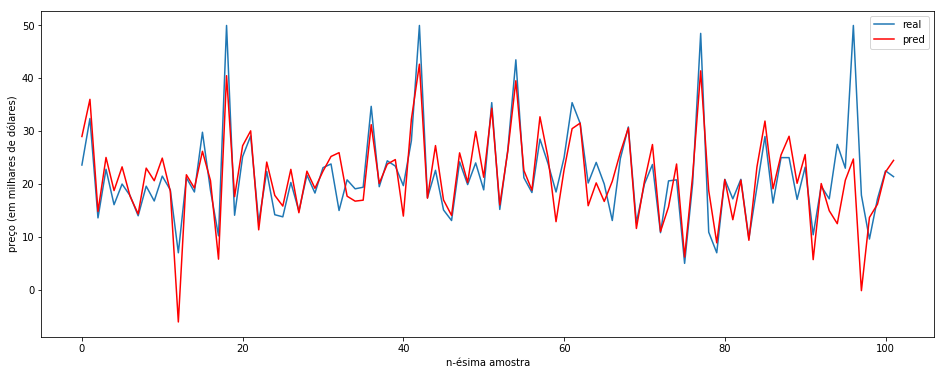

In [0]:
plt.figure(figsize=(16, 6))
plt.plot(y_test, label='real')
plt.plot(y_pred, label='pred', color='red')
plt.xlabel('n-ésima amostra')
plt.ylabel('preço (em milhares de dólares)')
plt.legend()

E aí, o que você achou do resultado do modelo?